# Chapter 2, Example 2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import os
if not os.path.isdir('figures'):
	os.makedirs('figures')

In [2]:
# set parameters
no_epochs = 1500
lr = 0.01

SEED = 10
np.random.seed(SEED)

In [3]:
# generate training data
X = np.random.rand(7,2)
Y = 1.0 +3.3*X[:,0]**2-2.5*X[:,1]+0.2*X[:,0]*X[:,1]
Y = Y.reshape(7,1)

print('X: %s'%X)
print('Y: %s'%Y)

X: [[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]]
Y: [[ 2.91460867]
 [ 0.54786923]
 [ 1.28050142]
 [-0.74174484]
 [ 0.87651328]
 [ 0.2972698 ]
 [-0.28002476]]


In [4]:
# a class for the preceptron
class Perceptron():
  def __init__(self):
    self.w = tf.Variable(np.random.rand(2,1), dtype=tf.float64)
    self.b = tf.Variable([0.], dtype=tf.float64)

  def __call__(self, x):
    u = tf.matmul(x, self.w) + self.b
    y = 4.0*tf.sigmoid(u)-1.0
    return y

In [5]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [6]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [8]:
model = Perceptron()
print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

w: [[0.81262096]
 [0.61252607]], b: [0.]


In [9]:
# Collect the history of W-values and b-values to plot later
mse = []
for epoch in range(no_epochs):
  
  mse.append(loss(model(X), Y))
  train(model, X, Y, learning_rate=0.1)

  if epoch%100 == 0:
      print('Epoch %2d:  loss=%2.5f'%(epoch, mse[-1]))

Epoch  0:  loss=2.10628
Epoch 100:  loss=0.11697
Epoch 200:  loss=0.06324
Epoch 300:  loss=0.05157
Epoch 400:  loss=0.04756
Epoch 500:  loss=0.04595
Epoch 600:  loss=0.04524
Epoch 700:  loss=0.04492
Epoch 800:  loss=0.04476
Epoch 900:  loss=0.04469
Epoch 1000:  loss=0.04466
Epoch 1100:  loss=0.04464
Epoch 1200:  loss=0.04463
Epoch 1300:  loss=0.04462
Epoch 1400:  loss=0.04462


In [16]:
# print learned weights
print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

pred = model(X)
print('y: %s'%pred.numpy())

final_loss = loss(pred, X)
print('mse: %2.5f'%final_loss)

w: [[ 3.55920497]
 [-2.88537542]], b: [-0.53561008]
y: tf.Tensor(
[[ 2.58260073]
 [ 0.56610001]
 [ 1.57351184]
 [-0.53362124]
 [ 0.81195362]
 [ 0.20010595]
 [-0.5229465 ]], shape=(7, 1), dtype=float64)
mse: 1.29682


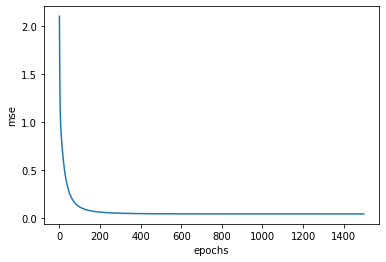

In [12]:
# plot learning curves
plt.figure(1)
plt.plot(range(no_epochs), mse)
plt.xlabel('epochs')
plt.ylabel('mse')
plt.savefig('./figures/2.2_1.png')

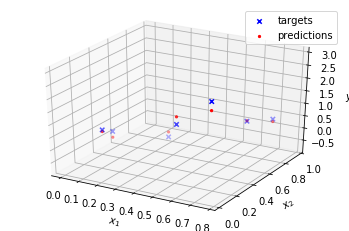

In [13]:
# plot trained and predicted points
fig = plt.figure(3)
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', marker='x', label='targets')
ax.scatter(X[:,0], X[:,1], pred.numpy(), color='red', marker='.', label='predictions')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.legend()
plt.savefig('./figures/2.2_2.png')

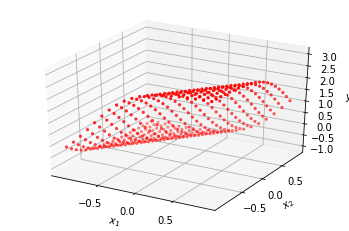

In [18]:
# Plot learned mapping
X1 = np.arange(-1, 1, 0.1)
X2 = np.arange(-1, 1, 0.1)
X = []
for i in range(len(X1)):
  for j in range(len(X2)):
    X.append([X1[i], X2[j]])

X = np.array(X)
pred = model(X).numpy()

fig = plt.figure(4)
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], pred, color='red', marker='.', label='predictions')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])
plt.savefig('./figures/2.2_3.png')